<a href="https://colab.research.google.com/github/deva-kumari/deva/blob/main/1.1%20blush.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words:
blush: 580
love: 351
color: 211
skin: 191
pigmented: 160
shade: 150
pink: 145
good: 135
perfect: 133
kylie: 131

Named Entities:
winter - DATE
all day - DATE
Kylie - PERSON
Kylie - PERSON
Winter Kissed - GPE
Kylie - PERSON
Winter Kissed - EVENT
Last for hours - TIME
doesnt - GPE
BRAND - ORG
just in seconds - TIME
Kylie - PERSON
every penny - MONEY
Kylie Cosmetics - ORG
336 - CARDINAL
winter - DATE
One - CARDINAL
winter - DATE
all day - DATE
daily - DATE
Kylie Cosmetics' - PERSON
Winterkissed - PERSON
Kylie Cosmetics - ORG
Pink Power - PRODUCT
daily - DATE
many years ago - DATE
many years ago - DATE
first - ORDINAL
Matte - PERSON
Un - ORG
dalla formulazione - ORG
un - ORG
prodotto persistente - ORG
leffetto - ORDINAL
blushen har - PERSON
Älskar - PERSON
Es un blush - ORG
pigmentación muy muy buena - PERSON
textura - GPE
tu - PERSON
un - ORG
encanta su - PERSON
Jätte - PERSON
köpte den dock - PERSON
jag har - PERSON
arbeta - ORG
Kylie - PERSON
BLUSH - ORG
Kylie Cosmetic

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 148 (\x94) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


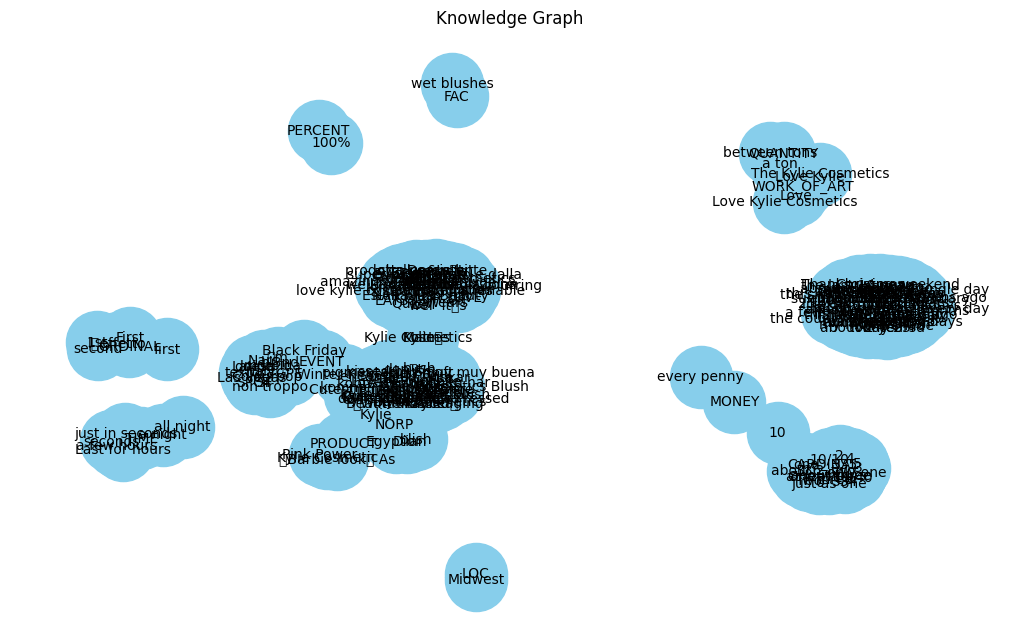

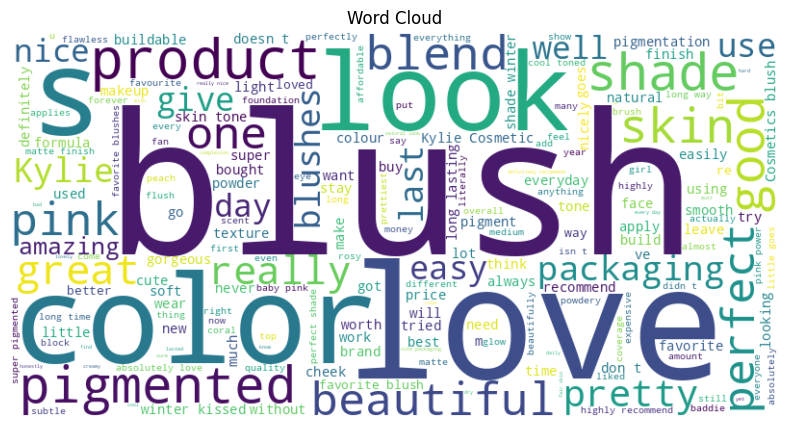


Top 10 Bigrams:
love blush: 69
kylie cosmetics: 59
winter kissed: 47
easy blend: 29
cosmetics blush: 29
lasts day: 26
love color: 26
skin tone: 25
love kylie: 25
blush pigmented: 25

TF-IDF Matrix:
    10  100   11  13th  1st  2019  2020  2022  2024  23rd  ...  yearrrss  \
0  0.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...       0.0   
1  0.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...       0.0   
2  0.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...       0.0   
3  0.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...       0.0   
4  0.0  0.0  0.0   0.0  0.0   0.0   0.0   0.0   0.0   0.0  ...       0.0   

   years  yellow  yes  youth  youthful  youtube  älskar   än   är  
0    0.0     0.0  0.0    0.0       0.0      0.0     0.0  0.0  0.0  
1    0.0     0.0  0.0    0.0       0.0      0.0     0.0  0.0  0.0  
2    0.0     0.0  0.0    0.0       0.0      0.0     0.0  0.0  0.0  
3    0.0     0.0  0.0    0.0       0.0      0.0     0.0  0.0  0.0  
4   

In [11]:
import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the CSV file with a specific encoding to avoid UnicodeDecodeError
csv_file = '/content/B1 (1).csv'
df = pd.read_csv(csv_file, encoding='ISO-8859-1')  # Change encoding here

# Combine all comments into a single string
text_data = ' '.join(df['COMMENT'].astype(str).tolist())  # Assuming the column is named 'COMMENT'

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower())  # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
    print(f"{word}: {count}")

# Step 2: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)
print("\nNamed Entities:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Step 3: Derive Knowledge Graph
edges = []
for ent in doc.ents:
    edges.append((ent.text, ent.label_))

# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)

# Step 4: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000, font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()
from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
  print(f"{' '.join(bigram)}: {count}")
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['COMMENT'])
# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())